In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [21]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [31]:
def print_photo(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(class_name[y[index]])

12348


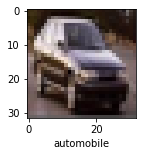

In [32]:
import random
i = random.randint(0,50000)
print(i)
print_photo(x_train, y_train, i)

In [33]:
## Scaling the data before model building

scaled_x_train = x_train/255
scaled_x_test = x_test/255

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(2500, activation='relu'),
    keras.layers.Dense(1500, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(scaled_x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 200s 125ms/step - loss: 1.8695 - accuracy: 0.3276
Epoch 2/10
1563/1563 [==============================] - 200s 128ms/step - loss: 1.6671 - accuracy: 0.3965
Epoch 3/10
1563/1563 [==============================] - 208s 133ms/step - loss: 1.5918 - accuracy: 0.4275
Epoch 4/10
1563/1563 [==============================] - 209s 133ms/step - loss: 1.5428 - accuracy: 0.4440
Epoch 5/10
1563/1563 [==============================] - 210s 134ms/step - loss: 1.5073 - accuracy: 0.4593
Epoch 6/10
1563/1563 [==============================] - 196s 126ms/step - loss: 1.4782 - accuracy: 0.4700
Epoch 7/10
1563/1563 [==============================] - 207s 132ms/step - loss: 1.4550 - accuracy: 0.4763
Epoch 8/10
1563/1563 [==============================] - 222s 142ms/step - loss: 1.4319 - accuracy: 0.4868
Epoch 9/10
1563/1563 [==============================] - 207s 132ms/step - loss: 1.4133 - accuracy: 0.4898
Epoch 10/10
1563/1563 [=======================

In [35]:
model.evaluate(scaled_x_test, y_test)

313/313 [==============================] - 11s 32ms/step - loss: 1.4861 - accuracy: 0.4793


[1.4860533475875854, 0.47929999232292175]

In [36]:
y_pred_ann=model.predict(scaled_x_test)

313/313 [==============================] - 12s 37ms/step


In [37]:
y_pred_ann=[np.argmax(i) for i in y_pred_ann]

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1000
           1       0.60      0.62      0.61      1000
           2       0.30      0.44      0.36      1000
           3       0.34      0.30      0.32      1000
           4       0.38      0.42      0.40      1000
           5       0.43      0.37      0.40      1000
           6       0.54      0.46      0.50      1000
           7       0.50      0.62      0.56      1000
           8       0.68      0.53      0.60      1000
           9       0.60      0.48      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000



In [44]:
cnn = keras.Sequential([
    
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn.fit(scaled_x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 37ms/step - loss: 1.4787 - accuracy: 0.4711
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.1209 - accuracy: 0.6067
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9925 - accuracy: 0.6534
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9149 - accuracy: 0.6827
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8511 - accuracy: 0.7030
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7976 - accuracy: 0.7227
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7495 - accuracy: 0.7376
Epoch 8/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7092 - accuracy: 0.7510
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6728 - accuracy: 0.7632
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [45]:
cnn.evaluate(scaled_x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9111 - accuracy: 0.6946


[0.9110760688781738, 0.694599986076355]

In [46]:
y_pred_cnn=cnn.predict(scaled_x_test)

313/313 [==============================] - 4s 12ms/step


In [47]:
y_pred_cnn=[np.argmax(i) for i in y_pred_cnn]

In [48]:
print(classification_report(y_test, y_pred_cnn))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1000
           1       0.84      0.80      0.82      1000
           2       0.64      0.54      0.58      1000
           3       0.47      0.57      0.52      1000
           4       0.66      0.64      0.65      1000
           5       0.57      0.62      0.59      1000
           6       0.73      0.76      0.75      1000
           7       0.76      0.71      0.74      1000
           8       0.80      0.82      0.81      1000
           9       0.74      0.81      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.70      0.69      0.70     10000



3474
using cnn: bird, using ann: frog


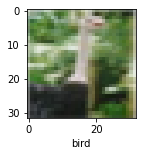

In [76]:
j = random.randint(0, 9999)

print(j)
print_photo(x_test,y_test,j)
print("using cnn: {}, using ann: {}".format(class_name[y_pred_cnn[j]], class_name[y_pred_ann[j]]))